# Car Fuel Classification

## Importing Required Libraries

In [1]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 27.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
)
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

## Defining the functions and methods to be used

In [3]:
def get_list_paths(path: str) -> list:
    """
    Get the list of paths from a directory.

    Args:
        path (str): Path to the directory.

    Returns:
        list: List of paths.
    """

    return [path + file for file in os.listdir(path) if ".csv" in file]


def read_selected_data(list_paths: list, columns: list) -> pd.DataFrame:
  """
    Read all the data with .csv extension from the list of paths and return a list of dataframes,
    selecting only specified columns.

    Args:
        list_paths (list): List of paths to the data.
        columns (list): List of columns to be included in the returned dataframes.

    Returns:
        list: List of dataframes (one dataframe per file), with selected columns.
  """
  # List comprehension to read each csv file and select only the specified columns
  return [pd.read_csv(path, usecols=columns) for path in list_paths if ".csv" in path]

def concatenate_dataframes(list_df: list) -> pd.DataFrame:
    """
    Concatenate a list of dataframes.

    Args:
        list_df (list): List of dataframes.

    Returns:
        pd.DataFrame: Dataframe with all the dataframes concatenated.
    """

    return pd.concat(list_df, ignore_index=True)

def is_convertible_to_float(value):
    try:
        float(value)
        return True
    except (ValueError, TypeError):
        return False

# Função para dividir os dados em treino, validação e teste
def split_data(df, train_size, valid_size, test_size):
    # Primeira divisão: separando treino do restante
    df_train, df_temp = train_test_split(df, train_size=train_size, shuffle=True, random_state=42)
    # Ajustando as proporções para a divisão seguinte
    proportion = valid_size / (valid_size + test_size)
    # Segunda divisão: separando validação e teste
    df_valid, df_test = train_test_split(df_temp, train_size=proportion, shuffle=True, random_state=42)
    return df_train, df_valid, df_test

# Função para normalizar os dados
def normalize(df, means, stds):
    df_normalized = df.copy()
    for column in numeric_columns:
        df_normalized[column] = (df[column] - means[column]) / stds[column]
    return df_normalized

# Verificar se há interseção entre conjuntos
def check_intersection(df1, df2):
    return any(df1.drop(columns=['F_Type']).merge(df2.drop(columns=['F_Type']), how='inner').duplicated())


def read_all_data(list_paths: list) -> pd.DataFrame:
    """
    Read all the data with .csv extension from the list of paths and return a list of dataframes.

    Args:
        list_paths (list): List of paths to the data.

    Returns:
        (list): List of dataframes (one dataframe per file
    """

    return [pd.read_csv(path) for path in list_paths if ".csv" in path]

def calculate_and_plot_correlation(df, target_column):
    corr_matrix = df.corr()
    target_corr = corr_matrix[[target_column]].drop(target_column)
    plt.figure(figsize=(10, 8))
    sns.heatmap(target_corr, annot=True, cmap='coolwarm', cbar=True)
    plt.title(f'Correlação com {target_column}')
    plt.show()

## Setting up the datasets

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
seed = 3005

In [6]:
datapath = '/content/drive/MyDrive/SIoT/Fuel_Classification/Data/'

In [7]:
df_train = pd.read_csv(datapath + '/NewTrain_Norm.csv')
df_test = pd.read_csv(datapath + '/NewValid_Norm.csv')
df_valid = pd.read_csv(datapath + '/NewTest_Norm.csv')

In [8]:
df_train.drop(columns=['Unnamed: 0'], inplace=True)
df_valid.drop(columns=['Unnamed: 0'], inplace=True)
df_test.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
print(f"Train:\n{df_train['F_Type'].value_counts()}\n")
print(f"Validation:\n{df_valid['F_Type'].value_counts()}\n")
print(f"Test:\n{df_test['F_Type'].value_counts()}\n")

Train:
F_Type
0    78539
1    78539
Name: count, dtype: int64

Validation:
F_Type
0    4620
1    4620
Name: count, dtype: int64

Test:
F_Type
1    9240
0    9240
Name: count, dtype: int64



## Visualizing features correlation with target variable

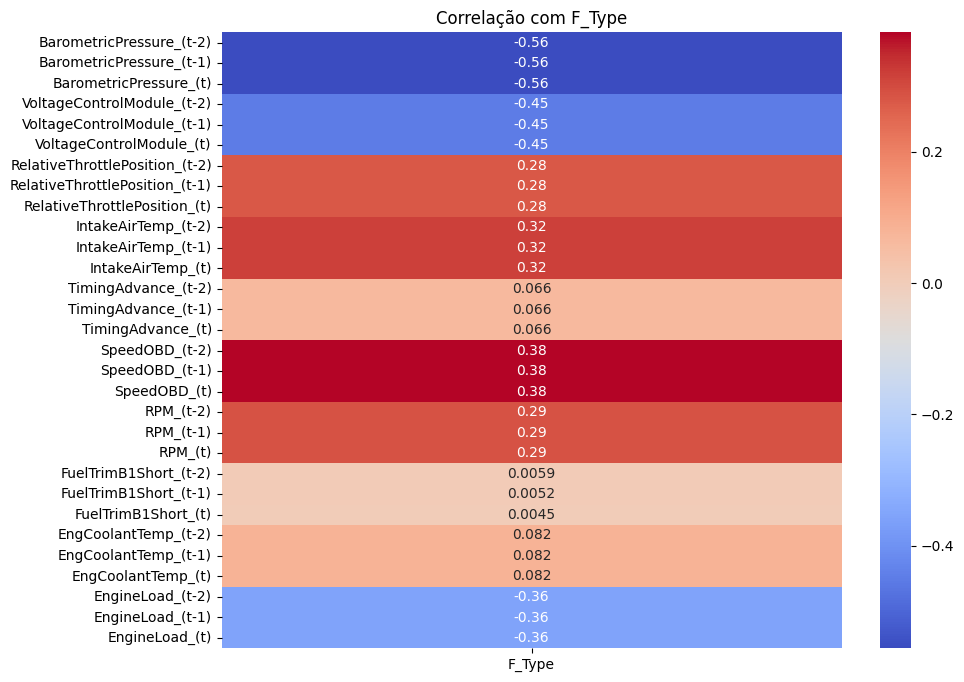

In [12]:
calculate_and_plot_correlation(df_train, 'F_Type')

In [13]:
df_train.columns.tolist()

['BarometricPressure_(t-2)',
 'BarometricPressure_(t-1)',
 'BarometricPressure_(t)',
 'VoltageControlModule_(t-2)',
 'VoltageControlModule_(t-1)',
 'VoltageControlModule_(t)',
 'RelativeThrottlePosition_(t-2)',
 'RelativeThrottlePosition_(t-1)',
 'RelativeThrottlePosition_(t)',
 'IntakeAirTemp_(t-2)',
 'IntakeAirTemp_(t-1)',
 'IntakeAirTemp_(t)',
 'TimingAdvance_(t-2)',
 'TimingAdvance_(t-1)',
 'TimingAdvance_(t)',
 'SpeedOBD_(t-2)',
 'SpeedOBD_(t-1)',
 'SpeedOBD_(t)',
 'RPM_(t-2)',
 'RPM_(t-1)',
 'RPM_(t)',
 'FuelTrimB1Short_(t-2)',
 'FuelTrimB1Short_(t-1)',
 'FuelTrimB1Short_(t)',
 'EngCoolantTemp_(t-2)',
 'EngCoolantTemp_(t-1)',
 'EngCoolantTemp_(t)',
 'EngineLoad_(t-2)',
 'EngineLoad_(t-1)',
 'EngineLoad_(t)',
 'F_Type']

## Selecting columns from a the Training and Validation Data

In [18]:
X_train = df_train[['FuelTrimB1Short_(t-2)', 'FuelTrimB1Short_(t-1)', 'FuelTrimB1Short_(t)',
                    'TimingAdvance_(t-2)', 'TimingAdvance_(t-1)', 'TimingAdvance_(t)',
                    'EngCoolantTemp_(t-2)', 'EngCoolantTemp_(t-1)', 'EngCoolantTemp_(t)',
                    'RPM_(t-2)', 'RPM_(t-1)', 'RPM_(t)',
                    'EngineLoad_(t-2)', 'EngineLoad_(t-1)', 'EngineLoad_(t)']]
y_train = df_train['F_Type']

X_valid = df_valid[['FuelTrimB1Short_(t-2)', 'FuelTrimB1Short_(t-1)', 'FuelTrimB1Short_(t)',
                    'TimingAdvance_(t-2)', 'TimingAdvance_(t-1)', 'TimingAdvance_(t)',
                    'EngCoolantTemp_(t-2)', 'EngCoolantTemp_(t-1)', 'EngCoolantTemp_(t)',
                    'RPM_(t-2)', 'RPM_(t-1)', 'RPM_(t)',
                    'EngineLoad_(t-2)', 'EngineLoad_(t-1)', 'EngineLoad_(t)']]
y_valid = df_valid['F_Type']

In [19]:
print("Size of X_train:", len(X_train))
print("Size of y_train:", len(y_train))
print("Size of X_valid:", len(X_valid))
print("Size of y_valid:", len(y_valid))

print("Unic classes in y_valid:", y_train.unique())
print("Unic classes in y_valid:", y_valid.unique())

Size of X_train: 157078
Size of y_train: 157078
Size of X_valid: 9240
Size of y_valid: 9240
Unic classes in y_valid: [0 1]
Unic classes in y_valid: [0 1]


## Classifiers Training

In [20]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=seed),
    "SVM": SVC(random_state=seed),
    "Decision Tree": DecisionTreeClassifier(random_state=seed),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=seed),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=seed),
    "AdaBoost": AdaBoostClassifier(random_state=seed),
    "Extra Trees": ExtraTreesClassifier(random_state=seed)
}

In [22]:
results = []

for name, clf in classifiers.items():
  print("Model name:", name)
  print(f"Classifier: {clf} \n")
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_valid)
  report = classification_report(y_valid, y_pred, output_dict=True)
  confusion = confusion_matrix(y_valid, y_pred)
  results.append({
      "Classifier": name,
      "Classification Report": report,
      "Confusion Matrix": confusion
  })

Model name: Random Forest
Classifier: RandomForestClassifier(random_state=3005) 

Model name: SVM
Classifier: SVC(random_state=3005) 

Model name: Decision Tree
Classifier: DecisionTreeClassifier(random_state=3005) 

Model name: KNN
Classifier: KNeighborsClassifier() 

Model name: Logistic Regression
Classifier: LogisticRegression(random_state=3005) 

Model name: Naive Bayes (Gaussian)
Classifier: GaussianNB() 

Model name: Naive Bayes (Bernoulli)
Classifier: BernoulliNB() 

Model name: Gradient Boosting
Classifier: GradientBoostingClassifier(random_state=3005) 

Model name: AdaBoost
Classifier: AdaBoostClassifier(random_state=3005) 



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model name: Extra Trees
Classifier: ExtraTreesClassifier(random_state=3005) 



### Classifiers performance

In [23]:
results_df = pd.DataFrame(results)
results_df

,Classifier,Classification Report,Confusion Matrix
0,Random Forest,"{'0': {'precision': 0.864187866927593, 'recall...","[[4416, 204], [694, 3926]]"
1,SVM,"{'0': {'precision': 0.8058628318584071, 'recal...","[[4371, 249], [1053, 3567]]"
2,Decision Tree,"{'0': {'precision': 0.856893922892616, 'recall...","[[3934, 686], [657, 3963]]"
3,KNN,"{'0': {'precision': 0.8234241399880692, 'recal...","[[4141, 479], [888, 3732]]"
4,Logistic Regression,"{'0': {'precision': 0.6773831775700935, 'recal...","[[3624, 996], [1726, 2894]]"
5,Naive Bayes (Gaussian),"{'0': {'precision': 0.7004662004662005, 'recal...","[[3606, 1014], [1542, 3078]]"
6,Naive Bayes (Bernoulli),"{'0': {'precision': 0.6384017758046615, 'recal...","[[2876, 1744], [1629, 2991]]"
7,Gradient Boosting,"{'0': {'precision': 0.7940047523304697, 'recal...","[[4344, 276], [1127, 3493]]"
8,AdaBoost,"{'0': {'precision': 0.7750385208012327, 'recal...","[[4024, 596], [1168, 3452]]"
9,Extra Trees,"{'0': {'precision': 0.8462844209732177, 'recal...","[[4487, 133], [815, 3805]]"


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## Best model performance - Random Forest

Accuracy of Random Forest: 0.9028138528138528


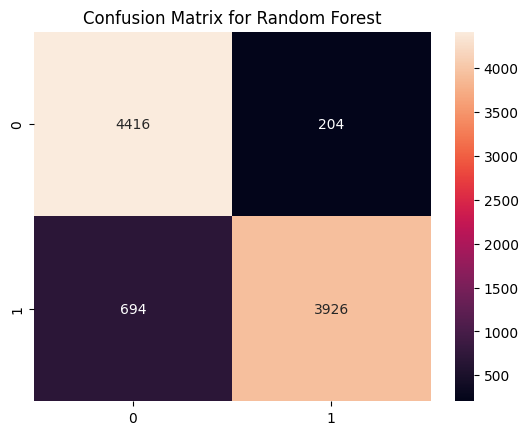

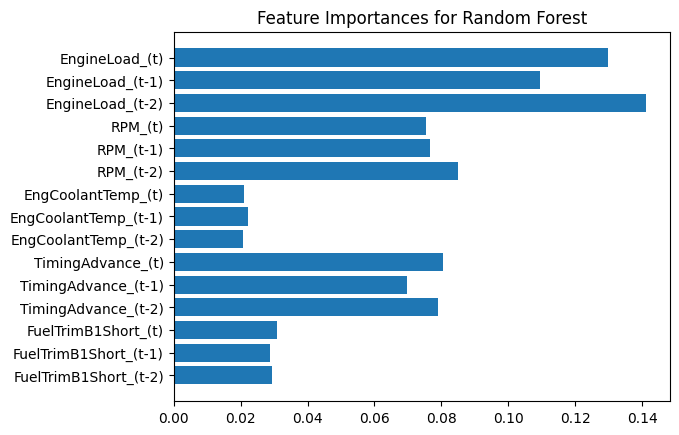

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      4620
           1       0.95      0.85      0.90      4620

    accuracy                           0.90      9240
   macro avg       0.91      0.90      0.90      9240
weighted avg       0.91      0.90      0.90      9240



In [25]:
random_forest = RandomForestClassifier(random_state=seed)
random_forest.fit(X_train, y_train)

rf_pred = random_forest.predict(X_valid)
rf_accuracy = accuracy_score(y_valid, rf_pred)
print('Accuracy of Random Forest:', rf_accuracy)

conf_mat = confusion_matrix(y_valid, rf_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()

importances = random_forest.feature_importances_
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(X_train.columns)), X_train.columns)
plt.title('Feature Importances for Random Forest')
plt.show()

report = classification_report(y_valid, rf_pred)
print('Classification Report for Random Forest:\n', report)

## Prunning best model - Random Forest

Accuracy for the prunned Random Forest model: 0.8514069264069264
Classification report for the prunned Random Forest model:
               precision    recall  f1-score   support

    Gasoline       0.78      0.98      0.87      4620
     Ethanol       0.97      0.72      0.83      4620

    accuracy                           0.85      9240
   macro avg       0.88      0.85      0.85      9240
weighted avg       0.88      0.85      0.85      9240



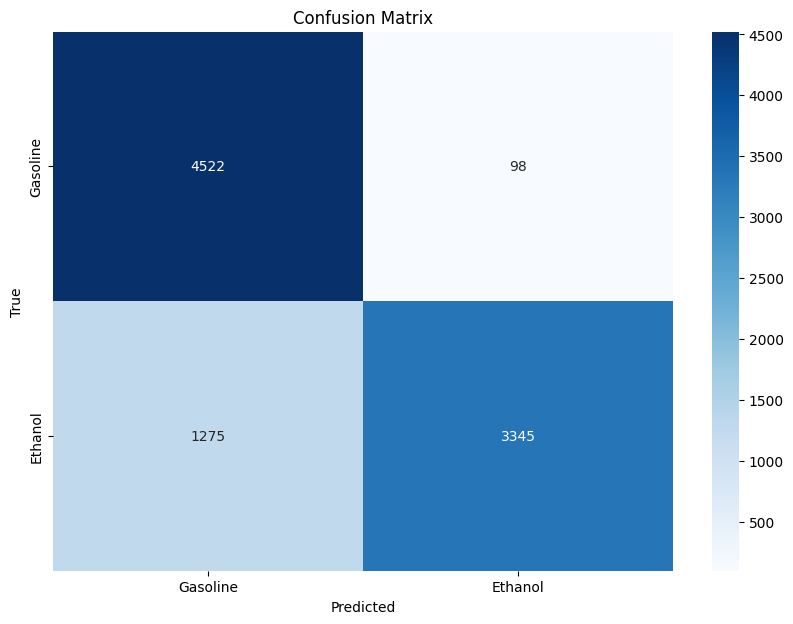

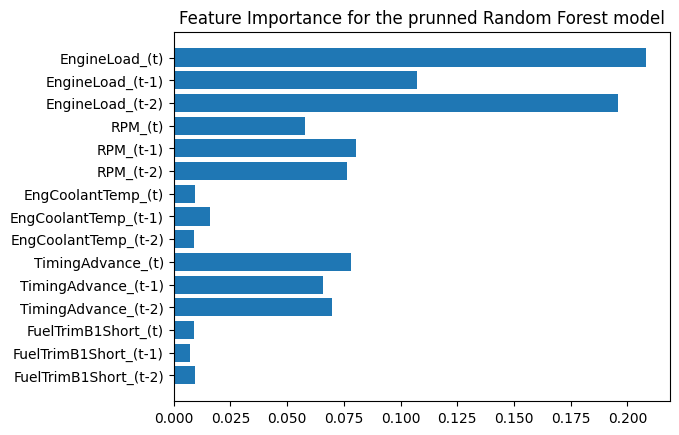

In [28]:
random_forest_emb = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=9,
    max_features='sqrt',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    monotonic_cst=None,
    n_estimators=30,
    n_jobs=None,
    oob_score=False,
    random_state=seed,
    verbose=0,
    warm_start=False,
)

random_forest_emb.fit(X_train, y_train)

rf_pred = random_forest_emb.predict(X_valid)

rf_accuracy = accuracy_score(y_valid, rf_pred)
print('Accuracy for the prunned Random Forest model:', rf_accuracy)

report = classification_report(y_valid, rf_pred, target_names=['Gasoline', 'Ethanol'])
print('Classification report for the prunned Random Forest model:\n', report)

conf_mat = confusion_matrix(y_valid, rf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', xticklabels=['Gasoline', 'Ethanol'], yticklabels=['Gasoline', 'Ethanol'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

importances = random_forest_emb.feature_importances_
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(X_train.columns)), X_train.columns)
plt.title('Feature Importance for the prunned Random Forest model')
plt.show()

## Embedding best model - Random Forest

In [29]:
!pip install micromlgen>=1.1.26

In [30]:
from micromlgen import port, port_testset

In [31]:
file_path_default = 'classifier_default.h'
with open(file_path_default, 'w') as file:
  file.write(port(random_forest, classname='RandomForestClassifier', tmp_file='examples/RFC.json'))

file_size_mb = (os.path.getsize(file_path_default)) / (1024 * 1024)
print(f"Memory ocupancy of the model'{file_path_default}': {file_size_mb:.5f} MB")

Memory ocupancy of the model'classifier_default.h': 752.43672 MB


In [32]:
file_path = 'classifier.h'
with open(file_path, 'w') as file:
  file.write(port(random_forest_emb, classname='RandomForestClassifier', tmp_file='examples/RFC.json'))

In [33]:
file_size_mb = (os.path.getsize(file_path)) / (1024 * 1024)
print(f"Memory ocupancy of the prunned model'{file_path}': {file_size_mb:.5f} MB")

Memory ocupancy of the prunned model'classifier.h': 2.50196 MB
